<a href="https://colab.research.google.com/github/leobezlel/excelr-assignments/blob/main/Assignment_17(Nueral_Networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Alphabets_data.csv')
df

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3       5      1     8    13      0      6   
1          I     5    12      3       7      2    10     5      5      4   
2          D     4    11      6       8      6    10     6      2      6   
3          N     7    11      6       6      3     5     9      4      6   
4          G     2     1      3       1      1     8     6      6      6   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19995      D     2     2      3       3      2     7     7      7      6   
19996      C     7    10      8       8      4     4     8      6      9   
19997      T     6     9      6       7      5     6    11      3      7   
19998      S     2     3      4       2      1     8     7      2      6   
19999      A     4     9      6       6      2     9     5      3      1   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0          6      10       8      0       8      0       8  
1         13       3       9      2       8      4      10  
2         10       3       7      3       7      3       9  
3          4       4      10      6      10      2       8  
4          6       5       9      1       7      5      10  
...      ...     ...     ...    ...     ...    ...     ...  
19995      6       6       4      2       8      3       7  
19996     12       9      13      2       9      3       7  
19997     11       9       5      2      12      2       4  
19998     10       6       8      1       9      5       8  
19999      8       1       8      2       7      2       8  

[20000 rows x 17 columns]

In [ ]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
df.duplicated().sum()

1332

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe()

xbox          ybox         width        height         onpix  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       4.150793      7.244322      5.279891      5.506910      3.660596   
std        1.879428      3.187660      1.934960      2.178292      2.160555   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        3.000000      5.000000      4.000000      4.000000      2.000000   
50%        4.000000      8.000000      5.000000      6.000000      3.000000   
75%        5.000000     10.000000      6.000000      7.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.919381      7.529409      4.584637      5.201361      8.353171   
std        2.032226      2.319834      2.625714      2.320102      2.468905   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             x2ybar        xy2bar         xedge        xedgey         yedge  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.452700      7.924577      3.131455      8.351832      3.796872   
std        2.624673      2.106957      2.323901      1.574853      2.540271   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        5.000000      7.000000      2.000000      8.000000      2.000000   
50%        6.000000      8.000000      3.000000      8.000000      4.000000   
75%        8.000000      9.000000      4.000000      9.000000      5.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

             yedgex  
count  18668.000000  
mean       7.784390  
std        1.657358  
min        0.000000  
25%        7.000000  
50%        8.000000  
75%        9.000000  
max       15.000000

<Axes: xlabel='count', ylabel='letter'>

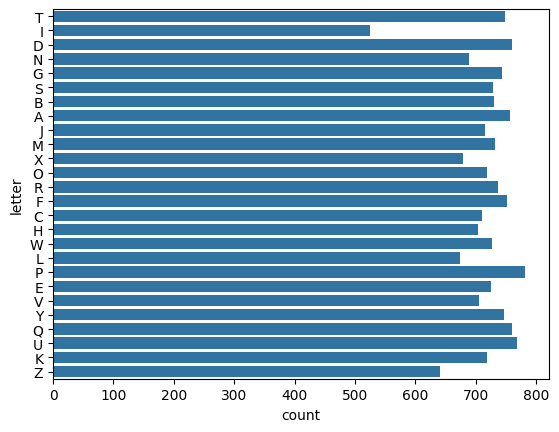

In [ ]:
sns.countplot(df["letter"])

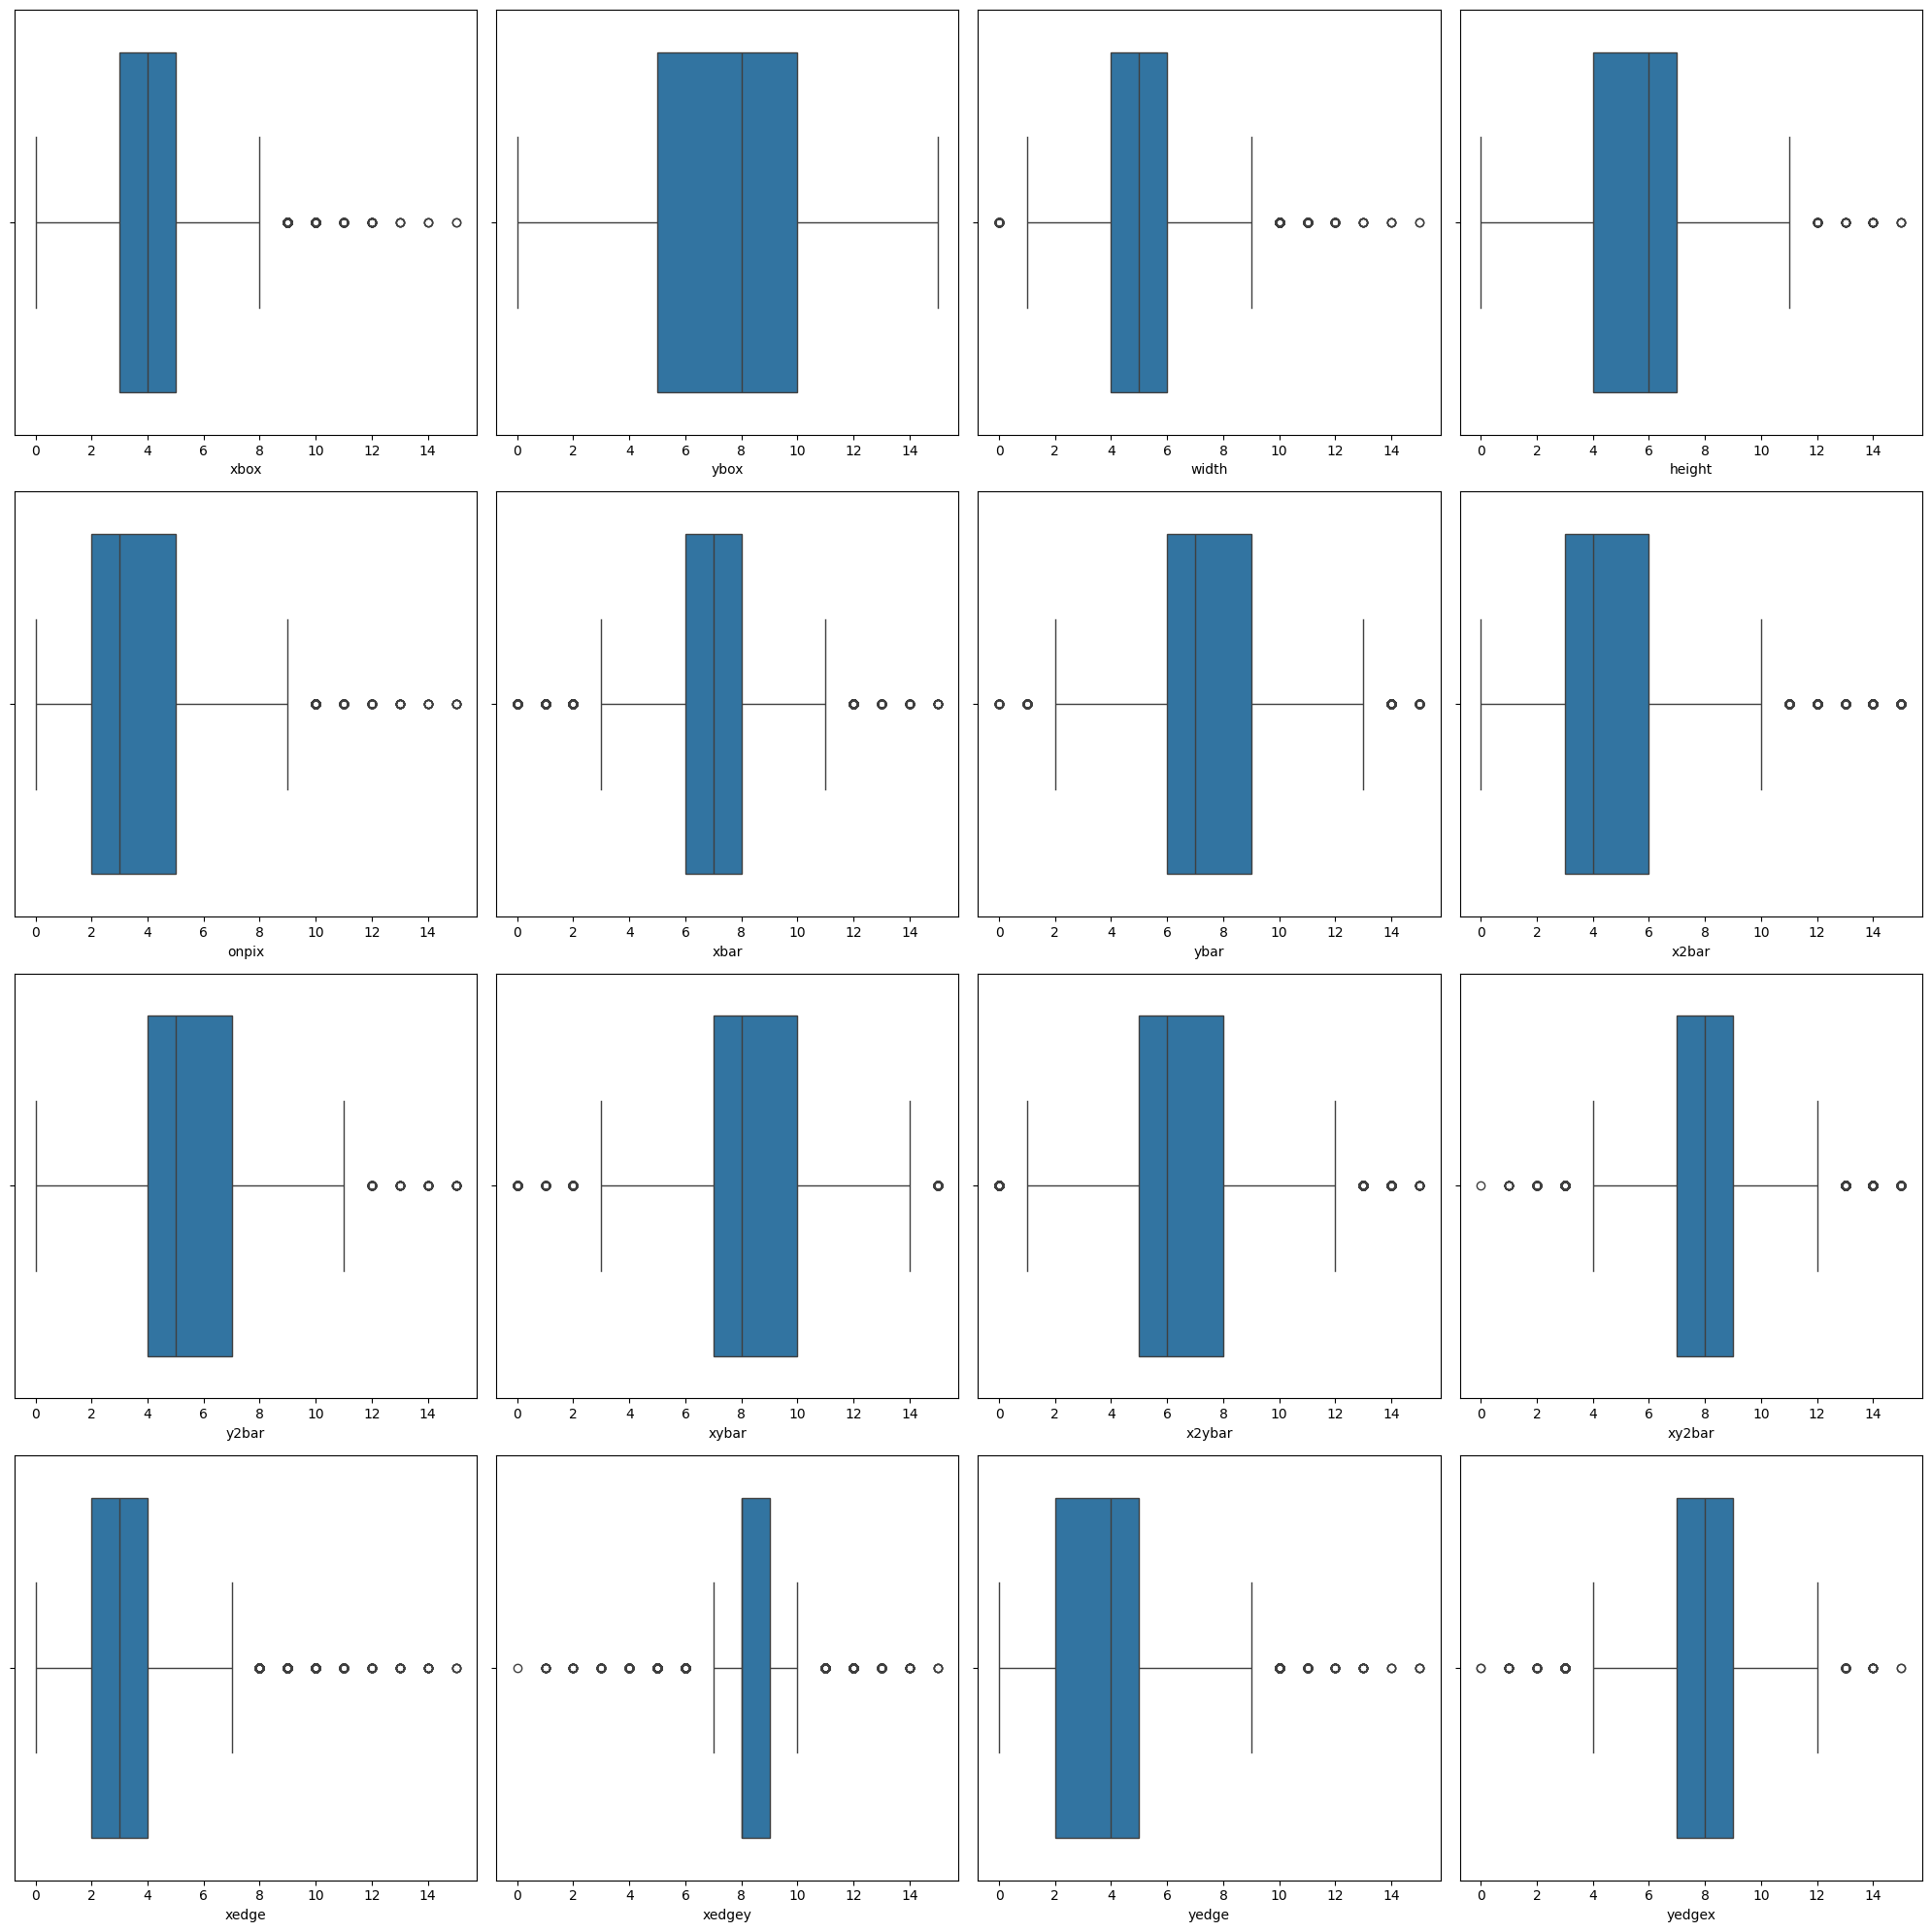

In [ ]:
cols = df.columns[1:].tolist()  # Exclude the last column
fig, ax = plt.subplots(4, 4, figsize=(20, 20))  # 4 rows, 4 columns for the subplots
r = c = 0
for col in cols:
    sns.boxplot(x=col, data=df, ax=ax[r, c])
    c += 1
    if c == 4:
        r += 1
        c = 0
plt.tight_layout()
plt.show()

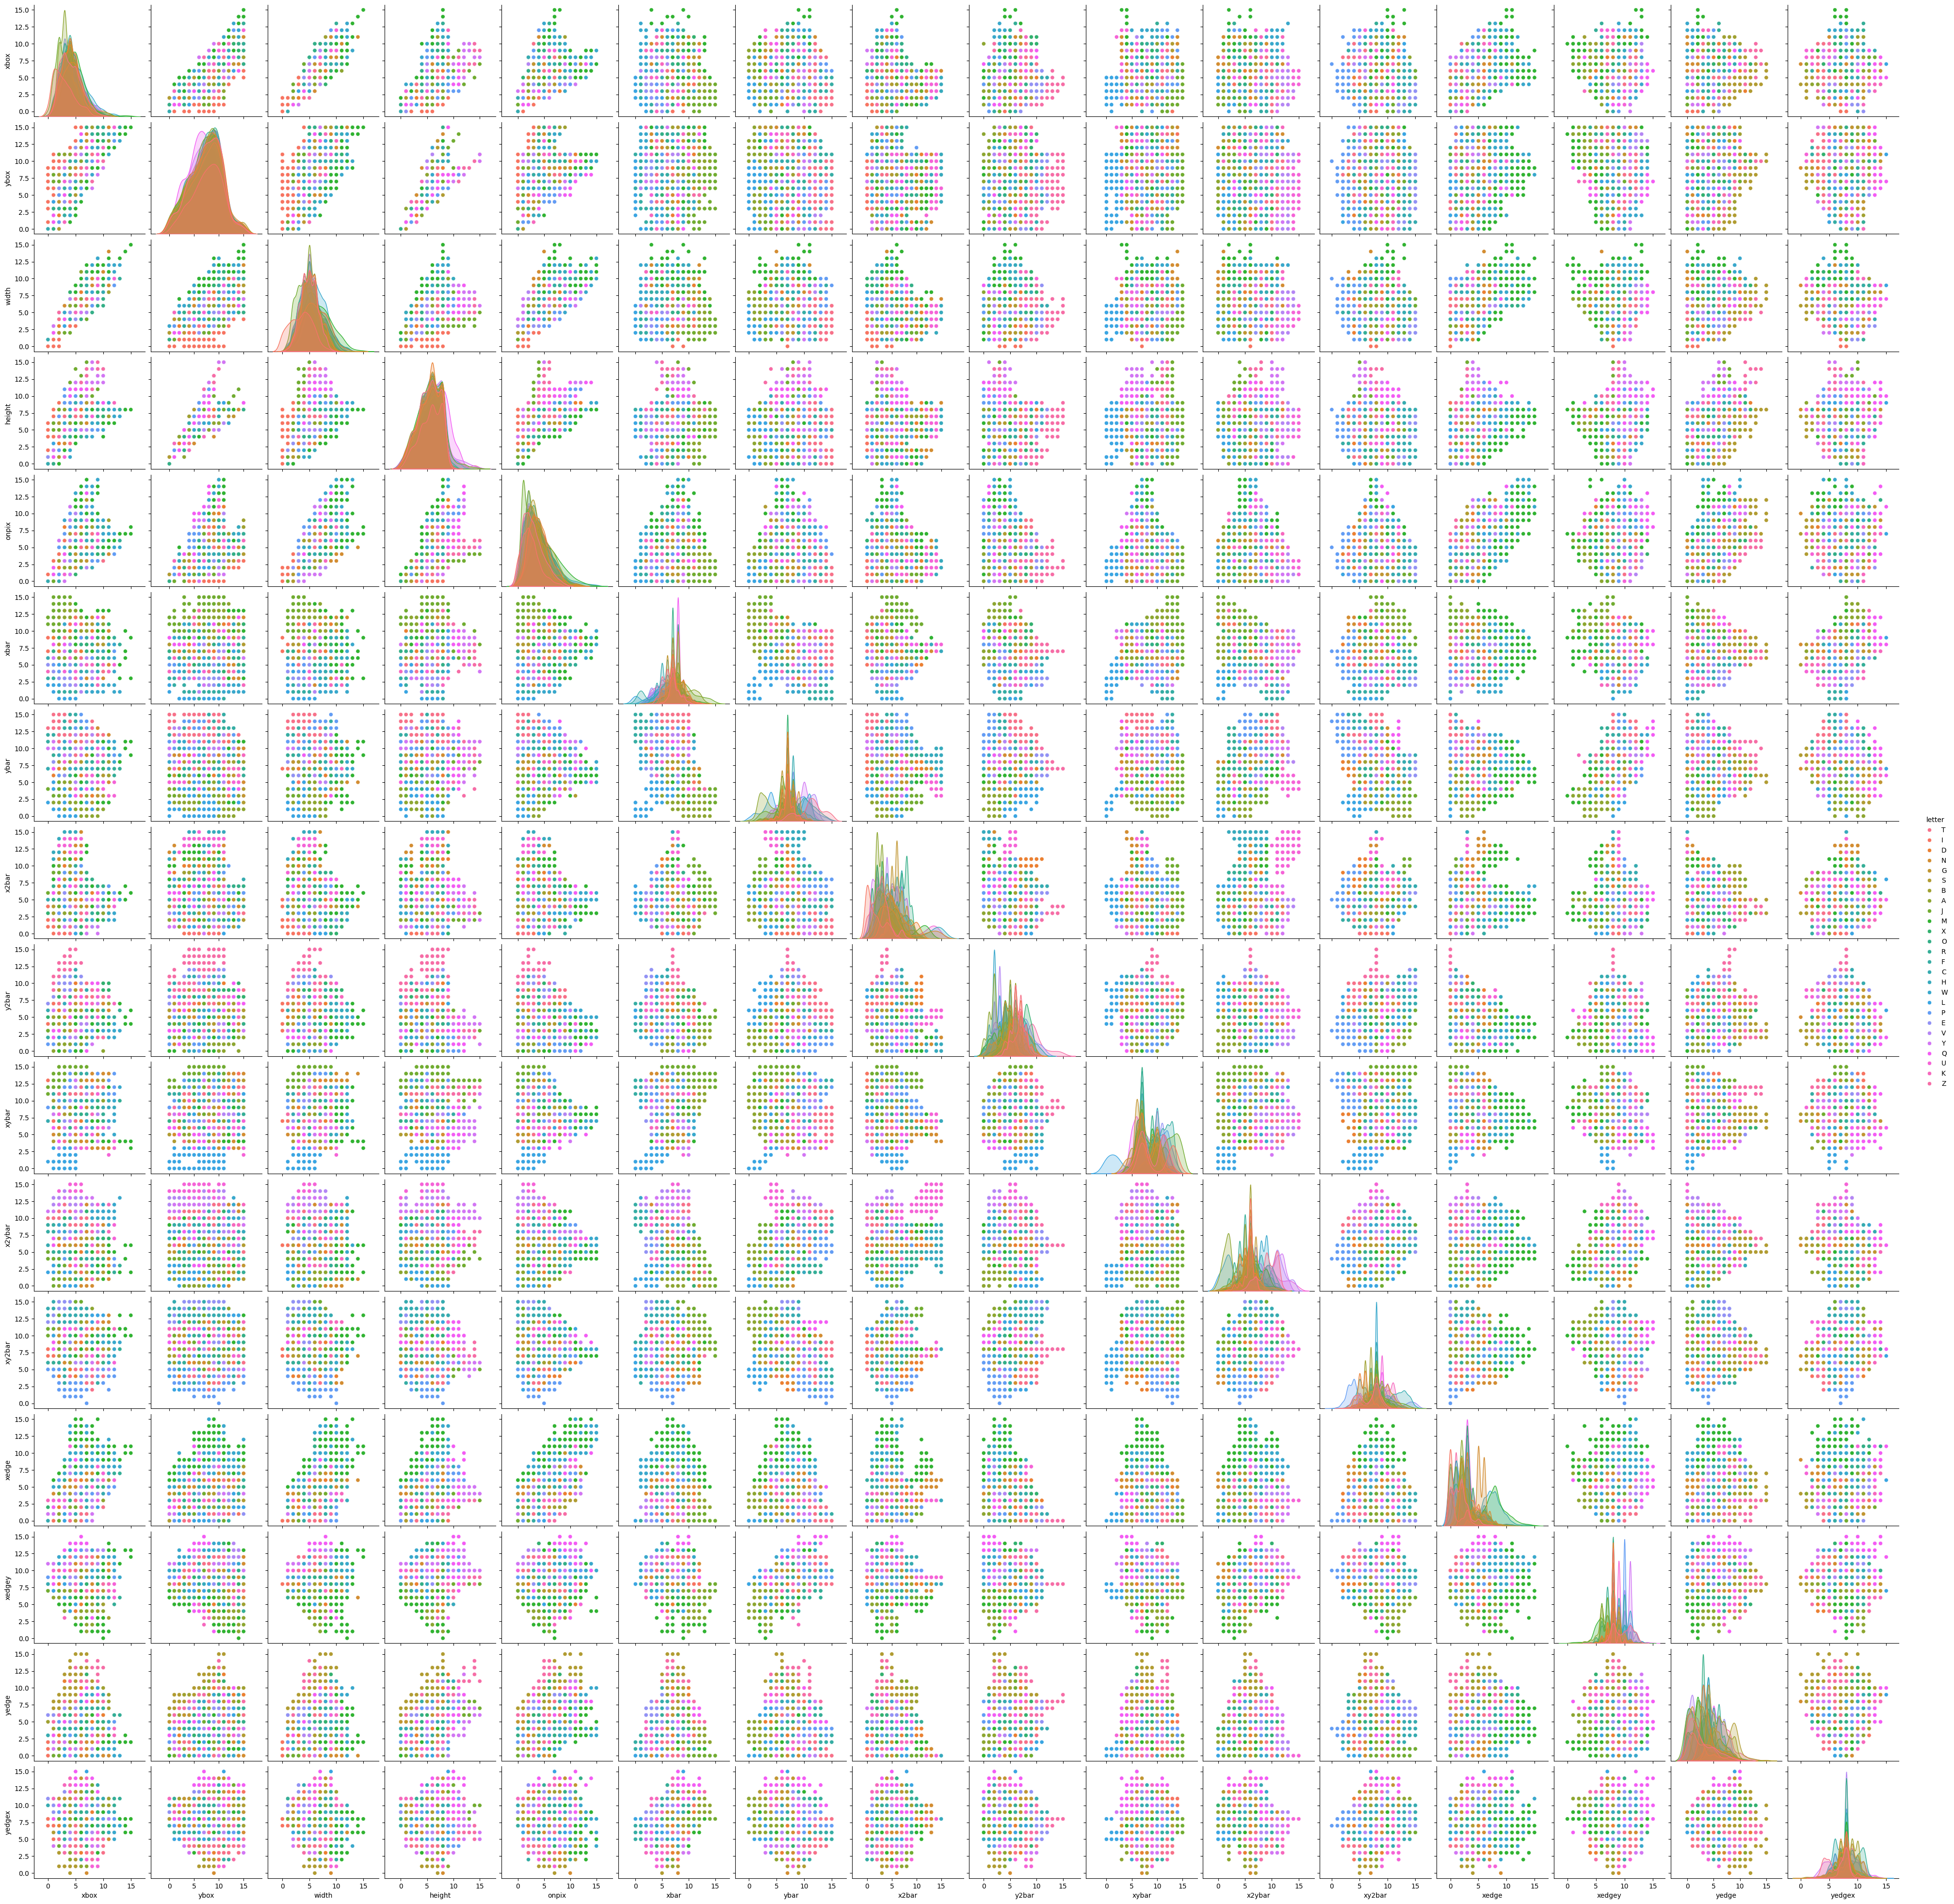

In [ ]:
sns.pairplot(df,hue='letter')

In [ ]:
X = df.drop('letter',axis=1).values
y = pd.get_dummies(df['letter']).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.25,random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
!pip install tensorflow

In [ ]:
# Importing keras related libraries
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
# input_shape
X_train_scaled.shape[1:]

In [ ]:
def build_model(n_hidden = 1, n_neurons=5, learning_rate=3e-3, input_shape=X_train_scaled.shape[1:]):
  '''
  Builds a keras ANN for Multi-Class Classification i.e. output classes which are mutually exclusive
  '''
  model = Sequential()
  options = {"input_shape": input_shape}
  # Adding input and hidden layers
  for layer in range(n_hidden):
    model.add(Dense(n_neurons,activation="relu",**options))
    options = {}
  # Adding output layer having 3 neurons, 1 per class
  model.add(Dense(3,activation='softmax'))
  # Creating instance of adam optimizer
  opt = Adam(learning_rate=learning_rate)
  model.compile(optimizer=opt,loss='categorical_crossentropy',metrics='accuracy')
  return model

In [ ]:
# Applying KerasClassifier Wrapper to neural network
keras_cls = KerasClassifier(build_model)

In [ ]:
# Hyperparameter tuning

from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import RandomizedSearchCV

param_dict = {
    "n_hidden" : (2,3),
    "n_neurons" : tuple(range(2,7)),
    "learning_rate" : (3e-2,3e-3,3e-4)
}

model_cv = RandomizedSearchCV(keras_cls, param_dict, n_iter=10, cv=3)

In [ ]:
%%time
model_cv.fit(
    X_train_scaled, y_train, epochs=150,
    validation_data = (X_test_scaled,y_test),
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=10)],
    verbose=0
)

In [ ]:
model_cv.best_params_
model_cv.best_score_

In [ ]:
# building model based on best set of parameters obtained from RandomSearchCV

best_set = model_cv.best_params_

model = build_model(learning_rate= best_set['learning_rate'],
                    n_hidden= best_set['n_hidden'], n_neurons= best_set['n_neurons'])

In [ ]:
model.fit(
    X_train_scaled, y_train, epochs=100,
    validation_data = (X_test_scaled,y_test),
    callbacks = [EarlyStopping(monitor='val_loss', mode='min', patience=10)],
    verbose=0
)

In [ ]:
# Plotting accuracy, loss of train and validation set
pd.DataFrame(model.history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [ ]:
# Model Evaluation

from sklearn.metrics import classification_report,confusion_matrix

# Instead of probabilities it provides class labels
pred_classes = model.predict_classes(X_test_scaled)
y_test_classes = np.argmax(y_test,axis=1)
print(classification_report(y_test_classes,pred_classes),"\n\n")
print(confusion_matrix(y_test_classes,pred_classes))